### Training the SNEE model

Setting up the environment

In [1]:
!pip install matplotlib==3.5
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.5.0-cp311-cp311-linux_x86_64.whl size=11114792 sha256=27f561dfb7319d84c81357a07efa4529d8f46217d62689952ec52d65c00e8e53
  Stored in directory: /root/.cache/pip/wheels/db/af/5a/22e418cb68b6b39226fa769754c0f8880d706f42383ac22dc7
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.5.0 which is incompatible.
bigframes 1.33.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00


In [ ]:
# Clone the repository
!git clone https://github.com/Ggenoni/SENN.git

Cloning into 'SENN'...
remote: Enumerating objects: 1853, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1853 (delta 103), reused 22 (delta 22), pack-reused 1700 (from 2)
Receiving objects: 100% (1853/1853), 26.18 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (1083/1083), done.


In [ ]:
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local/miniconda
import os
os.environ["PATH"] += ":/usr/local/miniconda/bin"

--2025-01-23 15:05:43--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147784736 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.94M   257MB/s    in 0.5s    

2025-01-23 15:05:44 (257 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [147784736/147784736]

PREFIX=/usr/local/miniconda
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that you

In [ ]:
!conda --version

conda 24.11.1


In [ ]:
# Change directory
%cd SENN

/content/SENN


In [ ]:
# Create the virtual environment
!conda env create -f environment.yml

Output streaming troncato alle ultime 5000 righe.

scipy-1.7.3          | 21.6 MB   | :  51% 0.5071754215552446/1 [03:59<03:32, 432.19s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5086203657761998/1 [03:59<03:50, 469.13s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5100653099971549/1 [04:00<04:04, 498.43s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.51151025421811/1 [04:01<04:10, 513.09s/it]  






scipy-1.7.3          | 21.6 MB   | :  51% 0.5129551984390651/1 [04:02<04:27, 548.60s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5144001426600202/1 [04:03<04:54, 606.51s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5158450868809754/1 [04:04<05:39, 700.29s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5172900311019305/1 [04:05<05:17, 657.33s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5187349753228856/1 [04:06<05:35, 696.26s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5201799195438407/1 [04:07<05:25, 679.29s/it]







In [ ]:
!source /usr/local/miniconda/bin/activate senn && which python

/usr/local/miniconda/envs/senn/bin/python


In [ ]:
# ==> After running this cell in Colab, restart the runtime changing kernell <==

!source /usr/local/miniconda/bin/activate senn
!pip install ipykernel
!python -m ipykernel install --user --name=senn --display-name "Python (senn)"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
Installed kernelspec senn in /root/.local/share/jupyter/kernels/senn


In [ ]:
# Check for plt.style.use strings in the code
import os

def search_in_files(directory, search_string):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".py"):  # Search only in Python files
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    for i, line in enumerate(f):
                        if search_string in line:
                            print(f"Found in {file_path}, line {i + 1}: {line.strip()}")

# Replace '.' with the directory you want to search (e.g., '/content/SENN')
search_in_files('/content/SENN', 'plt.style.use')


Found in /content/SENN/senn/trainer.py, line 25: #plt.style.use('seaborn-talk')
Found in /content/SENN/senn/utils/plot_utils.py, line 17: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/utils/plot_utils.py, line 231: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/models/senn.py, line 254: #plt.style.use('seaborn-paper')


In [ ]:
# Add the style file
!mkdir -p ~/.config/matplotlib/stylelib/
!echo -e "axes.titlesize: 18\naxes.labelsize: 14\nfigure.dpi: 100" > ~/.config/matplotlib/stylelib/seaborn-paper.mplstyle


In [ ]:
!git config --global user.email "gaudenzia.genoni@gmail.com"
!git config --global user.name "Ggenoni"


Training the model

In [ ]:
%cd SENN

/content/SENN


In [ ]:
# Train the model with our config file

!source /usr/local/miniconda/bin/activate senn && python main.py --config configs/config.json

 EXPERIMENT: mnist_lambda1e-4_seed29
{'aggregator': 'SumAggregator',
 'batch_size': 200,
 'cl_sizes': [1, 10, 20],
 'concept_dim': 1,
 'concept_reg': 1,
 'conceptizer': 'ConvConceptizer',
 'data_path': 'datasets/data/mnist_data',
 'dataloader': 'mnist',
 'device': 'cpu',
 'dropout': 0.5,
 'epochs': 5,
 'eval_freq': 270,
 'exp_name': 'mnist_lambda1e-4_seed29',
 'hidden_sizes': [320, 50],
 'image_size': 28,
 'lr': 0.0002,
 'manual_seed': 29,
 'num_classes': 10,
 'num_concepts': 5,
 'parameterizer': 'ConvParameterizer',
 'print_freq': 100,
 'robust_reg': 0.0001,
 'robustness_loss': 'mnist_robustness_loss',
 'sparsity_reg': 2e-05,
 'train': True}
Using device cpu
Loading data ...
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/

In [ ]:
!git add -f results/

In [ ]:
!git commit -m "Force add results folder"

# Change token with the real token
!git remote set-url origin https://{token}@github.com/Ggenoni/SENN.git
!git push origin master

In [ ]:
import json
import torch
import numpy as np
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from pathlib import Path
from types import SimpleNamespace
from importlib import import_module

In [ ]:
! pwd

/content


In [ ]:
%cd SENN

/content/SENN


In [ ]:
from senn.models.losses import *
from senn.models.parameterizers import *
from senn.models.conceptizers import *
from senn.models.aggregators import *
from senn.models.senn import SENN, DiSENN

In [ ]:
from senn.models.senn import SENNWrapper
from senn.models.senn import LimeWrapper


In [ ]:
# If the cell above does not work, try this one
import importlib
import senn.models.senn
importlib.reload(senn.models.senn)

from senn.models.senn import SENNWrapper
from senn.models.senn import LimeWrapper


In [ ]:
from senn.datasets.dataloaders import get_dataloader
from senn.utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot


In [ ]:
from senn.datasets.dataloaders import get_dataloader
from senn.utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot


In [ ]:
def load_checkpoint(config):
    model_file = Path('results') / config.exp_name / "checkpoints" / "best_model.pt"
    return torch.load(model_file, config.device)


In [ ]:
def get_config(filename):
    config_path = Path('configs')
    config_file = config_path / filename
    with open(config_file, 'r') as f:
        config = json.load(f)

    return SimpleNamespace(**config)

In [ ]:
def accuracy(model, dataloader, config):
    accuracies = []
    model.eval()
    with torch.no_grad():
        for i, (x, labels) in enumerate(dataloader):
            x = x.float().to(config.device)
            labels = labels.long().to(config.device)
            y_pred, (concepts, relevances), _ = model(x)
            accuracies.append((y_pred.argmax(axis=1) == labels).float().mean().item())
    accuracy = np.array(accuracies).mean()
    print(f"Test Mean Accuracy: {accuracy * 100: .3f} %")


In [ ]:
mnist_config = get_config("config.json")
#mnist_config.device = "cpu"

In [ ]:
_, _, mnist_test_dl = get_dataloader(mnist_config)

In [ ]:
conceptizer = ConvConceptizer(**mnist_config.__dict__)
parameterizer = ConvParameterizer(**mnist_config.__dict__)
aggregator = SumAggregator(**mnist_config.__dict__)

mnist_SENN = SENN(conceptizer, parameterizer, aggregator)


In [ ]:
mnist_checkpoint = load_checkpoint(mnist_config)
mnist_SENN.load_state_dict(mnist_checkpoint['model_state'])


<ipython-input-16-b45a5eb91e0b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_file, config.device)


<All keys matched successfully>

In [ ]:
accuracy(mnist_SENN, mnist_test_dl, mnist_config)


Test Mean Accuracy:  93.810 %


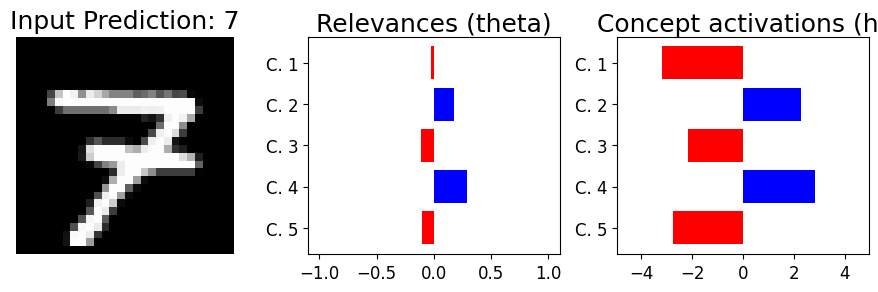

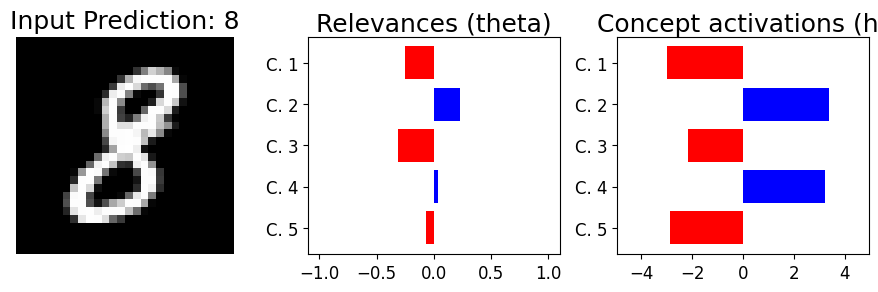

In [ ]:
# Rememer to save the images!!!!
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


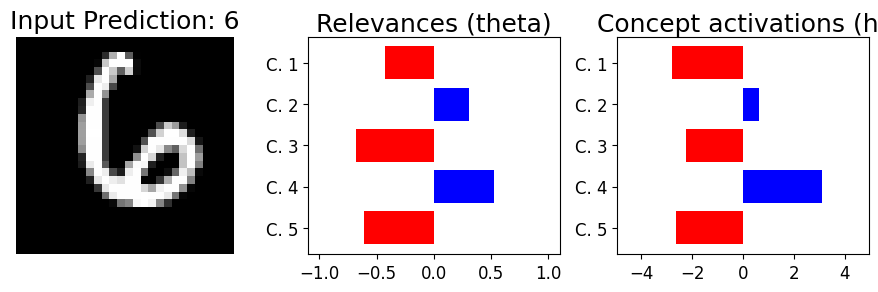

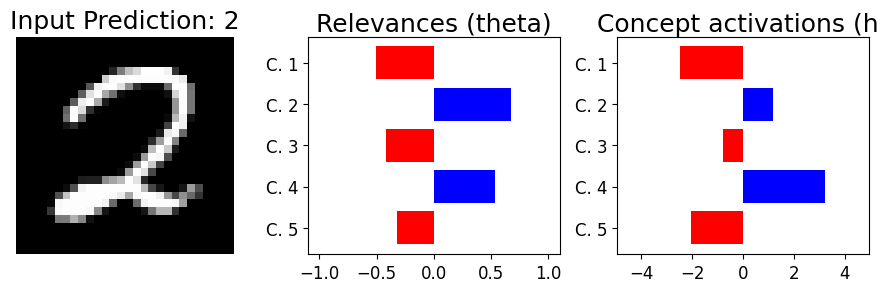

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


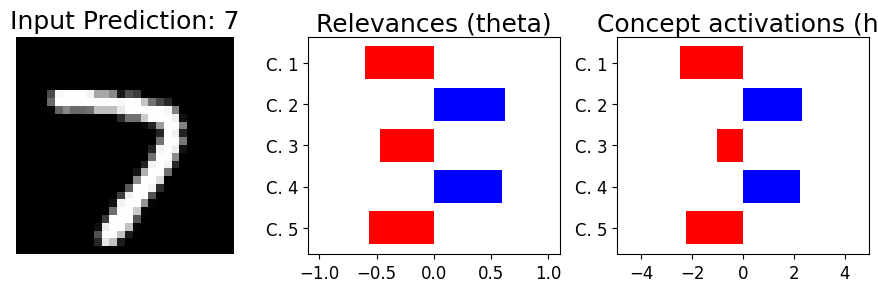

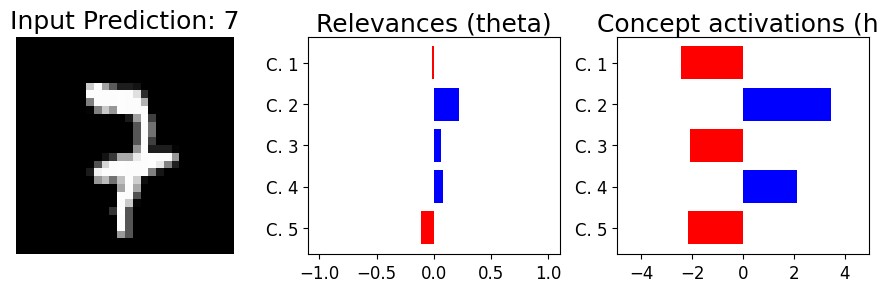

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


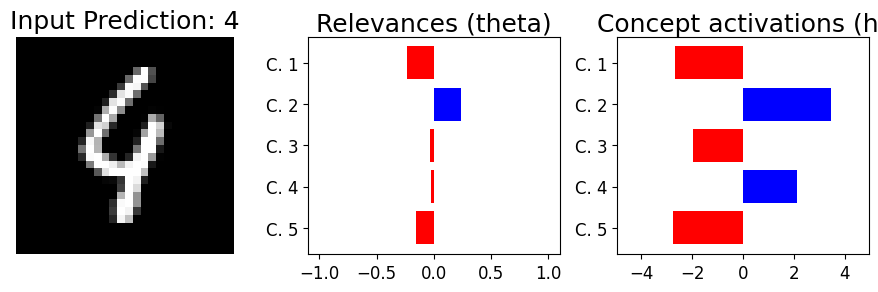

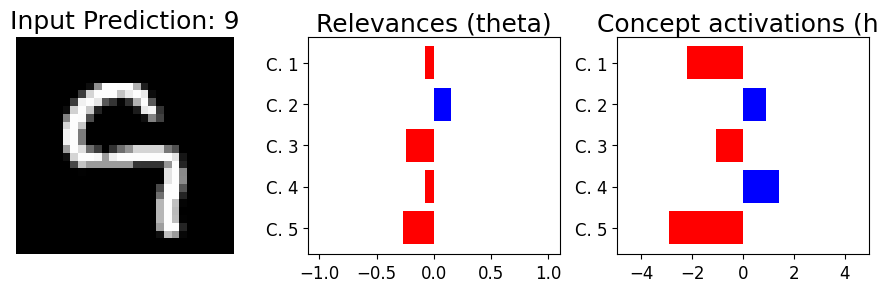

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


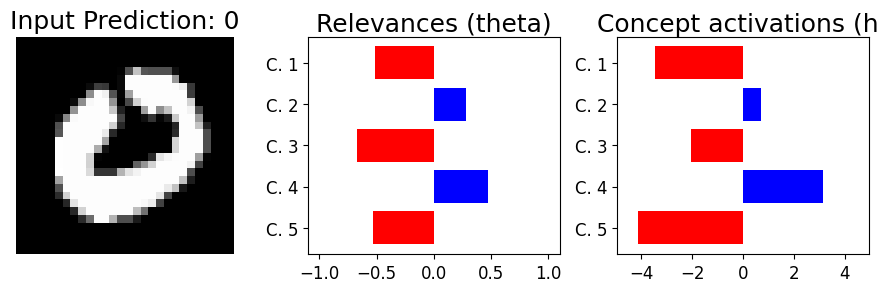

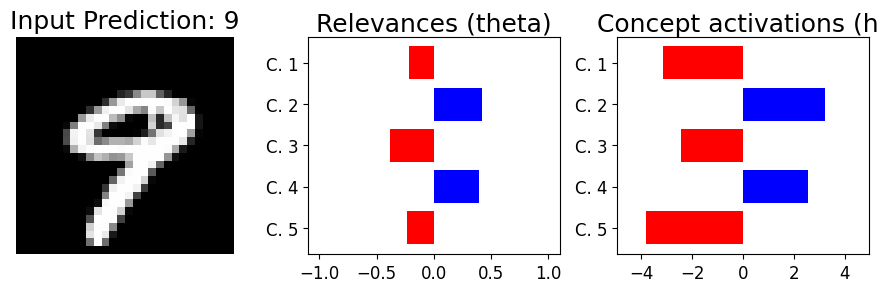

In [ ]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


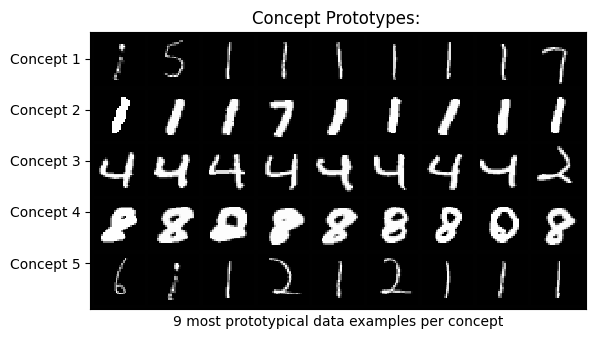

<Figure size 640x480 with 0 Axes>

In [ ]:
show_prototypes(mnist_SENN, mnist_test_dl, 'activation')


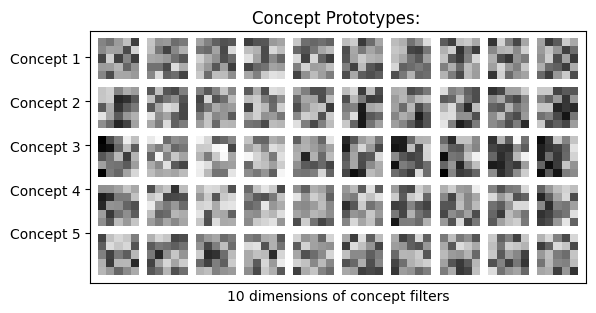

<Figure size 640x480 with 0 Axes>

In [ ]:
show_prototypes(mnist_SENN, mnist_test_dl, 'filter')

In [ ]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt


In [ ]:
wrapped_model = SENNWrapper(mnist_SENN)


In [ ]:
from captum.attr import IntegratedGradients
ig = IntegratedGradients(wrapped_model)


In [ ]:
import torch

# Get the total number of samples in the dataset
dataset = mnist_test_dl.dataset
num_samples = len(dataset)

# Randomly pick an index
random_index = torch.randint(0, num_samples, (1,)).item()

# Retrieve the sample and label
sample_input, sample_label = dataset[random_index]

# Add batch dimension
sample_input = sample_input.unsqueeze(0)

print(f"Random Index: {random_index}, Label: {sample_label}")


Random Index: 8421, Label: 7


In [ ]:
# Pass the input through the model to get predictions
predictions = wrapped_model(sample_input)  # Use the wrapped model
predicted_label = torch.argmax(predictions, dim=1).item()  # Get the predicted class index


In [ ]:
print('Predicted:', predicted_label)

Predicted: 7


In [ ]:
# Compute attributions for the predicted label
attributions = ig.attribute(sample_input, target=predicted_label)


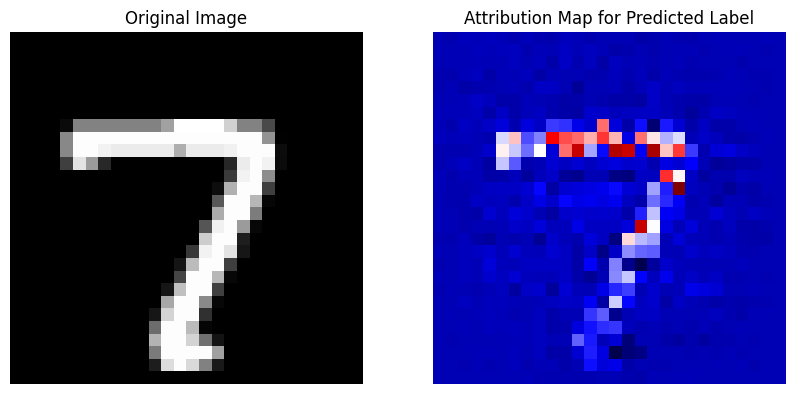

In [ ]:
# Visualize the attribution map
import matplotlib.pyplot as plt
attributions = attributions.squeeze().detach().numpy()
input_image = sample_input.squeeze().detach().numpy()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(input_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(attributions, cmap='seismic') #or "hot"
ax[1].set_title("Attribution Map for Predicted Label")
ax[1].axis('off')


plt.show()

Attribution Maps and Color Legend
Attributions Represent Impact on the Model's Decision:

The attribution map shows how each pixel in the input image contributes to the model's decision for the selected label.
Pixels with higher absolute attribution values have a greater impact on the prediction.
Color Encoding (Assuming hot Colormap):

Red/Yellow (Positive Values):
These regions positively contribute to the predicted label.
The model considers these areas as evidence for the prediction.
Black/Blue (Negative Values):
These regions negatively contribute to the predicted label.
The model considers these areas as evidence against the prediction.
White/Gray (Near Zero Values):
These regions have little to no impact on the prediction.
Interpretation of a Black Dot:

A black dot (or dark blue, depending on your colormap) represents a strong negative contribution in the attribution process.
This means the model interprets that pixel as reducing confidence in the predicted label.
Interpretation of a White Dot:

A white dot (or light gray) represents a neutral contribution (close to zero attribution).
The model finds that pixel irrelevant to its decision for the predicted label.


Legend for Seismic Colormap
Red (Positive Values):

Indicates a positive contribution to the model's prediction for the selected label.
The model considers these pixels as evidence supporting the predicted label.
Darker red = stronger positive contribution.
Blue (Negative Values):

Indicates a negative contribution to the model's prediction for the selected label.
The model considers these pixels as evidence against the predicted label.
Darker blue = stronger negative contribution.
White (Near Zero Values):

Indicates a neutral or insignificant contribution to the model's decision.
These pixels have little to no influence on the predicted label.
Scale Interpretation
The range of values in the attribution map depends on the magnitude of the attributions produced by Integrated Gradients. Typically:
+1 (Bright Red): Strong positive influence.
-1 (Bright Blue): Strong negative influence.
0 (White): No contribution.
If your attributions don’t fall neatly into this range, Captum will automatically normalize the values to fit the colormap.

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=01ec83391568d893207381801dd2fd7761a02bb34abc5073644868e49fb19bb5
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import gray2rgb

In [ ]:
import random

In [ ]:
# Get one batch from the test DataLoader
data_iter = iter(mnist_test_dl)
images, labels = next(data_iter)  # Images: (batch_size, 1, 28, 28), Labels: (batch_size)

# Select a random index from the batch
random_index = random.randint(0, images.size(0) - 1)  # Random index between 0 and batch_size-1

# Select the image and label at the random index
sample_image = images[random_index].squeeze(0).numpy()  # Convert to 2D array
sample_label = labels[random_index].item()  # Get label as integer

# Select the first image and label
#sample_image = images[0].squeeze(0).numpy()  # Convert to 2D array
#sample_label = labels[0].item()  # Get label as integer

In [ ]:
from skimage.color import rgb2gray

def predict_function(images):
    """
    Prediction function for LIME.
    Takes RGB images, converts them to grayscale, and returns probabilities.
    """
    # Convert RGB (3 channels) to grayscale (1 channel)
    grayscale_images = np.array([rgb2gray(image) for image in images])  # Shape: (batch_size, H, W)

    # Add the channel dimension for PyTorch model compatibility
    grayscale_images = np.expand_dims(grayscale_images, axis=1)  # Shape: (batch_size, 1, H, W)

    # Normalize images
    images_tensor = torch.tensor(grayscale_images).float()
    images_tensor = (images_tensor - 0.1307) / 0.3081  # MNIST normalization

    # Pass through the model
    with torch.no_grad():
        outputs = mnist_SENN(images_tensor)  # This is a tuple; extract logits
        logits = outputs[0]  # Assuming the first element contains the logits

    return logits.softmax(dim=1).numpy()  # Convert logits to probabilities

In [ ]:
# Initialize the LIME Image Explainer
explainer = lime_image.LimeImageExplainer()

# LIME expects the image in HxWxC format
sample_image_rgb = gray2rgb(sample_image)  # Convert grayscale to RGB (HxWxC)

# Generate explanation
explanation = explainer.explain_instance(
    image=sample_image_rgb,  # The input image
    classifier_fn=predict_function,  # The prediction function
    top_labels=2,  # Number of classes to explain
    hide_color=0,  # Color for "hidden" pixels
    num_samples=1000  # Number of perturbations
)

In [ ]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False
)

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(sample_image_rgb, mask))
plt.title(f"Explanation for Label {explanation.top_labels[0]}")
plt.axis('off')
plt.show()

Cancel what follows? (Also, remember to cancel the LIMEWrappper inside senn.py)

In [ ]:
wrapped_model = LimeWrapper(mnist_SENN)


In [ ]:
from lime.lime_image import LimeImageExplainer

explainer = LimeImageExplainer()


In [ ]:
def preprocess_image(image):
    """
    Preprocesses the input image for the model.
    - image: Input image as a NumPy array.
    Returns the normalized image tensor.
    """
    image = torch.tensor(image, dtype=torch.float32)
    image = image.unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    if torch.cuda.is_available():
        image = image.cuda()
    return image


In [ ]:
# Select a sample image from the test dataset
mnist_test_iter = iter(mnist_test_dl)
inputs, labels = next(mnist_test_iter)
sample_input = inputs[0].squeeze().numpy()  # Convert to NumPy array for LIME
sample_label = labels[0].item()  # True label


In [ ]:
explanation = explainer.explain_instance(
    image=sample_input,  # Input image
    classifier_fn=wrapped_model,  # Wrapped model itself (callable)
    top_labels=1,  # Number of labels to explain
    hide_color=0,  # Background color to hide superpixels
    num_samples=1000  # Number of perturbations for LIME
)


  0%|          | 0/1000 [00:00<?, ?it/s]

RuntimeError: Input shape mismatch. Expected [batch_size, 1, 28, 28], got torch.Size([10, 28, 1, 28]).